# Data Preparation

In [ ]:
import pandas as pd

df = pd.read_csv("Crop_recommendation.csv")
df = df.rename(columns=str.lower).drop_duplicates().dropna()

df.shape

(2200, 8)

In [ ]:
num_cols = ["n","p","k","temperature","humidity","ph","rainfall"]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna()

df[num_cols].dtypes

,0
n,int64
p,int64
k,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64


In [ ]:
df["label"] = df["label"].astype("category")

df["label"].notna().all(), df["label"].nunique(), df.shape

(np.True_, 22, (2200, 8))

# Data Analysis 1 - Descriptive

In [10]:
import matplotlib.pyplot as plt

cols = ["n","p","k","temperature","humidity","ph","rainfall"]
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
n,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
p,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
k,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


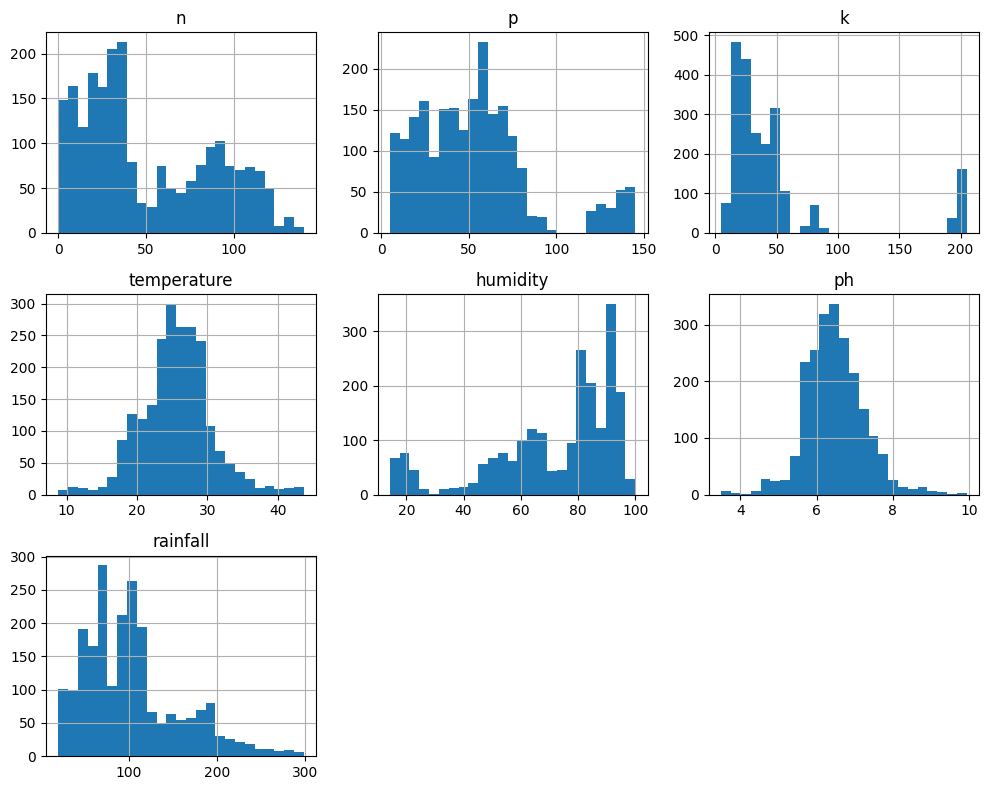

In [9]:
df[cols].hist(bins=25, figsize=(10,8))
plt.tight_layout()
plt.show()

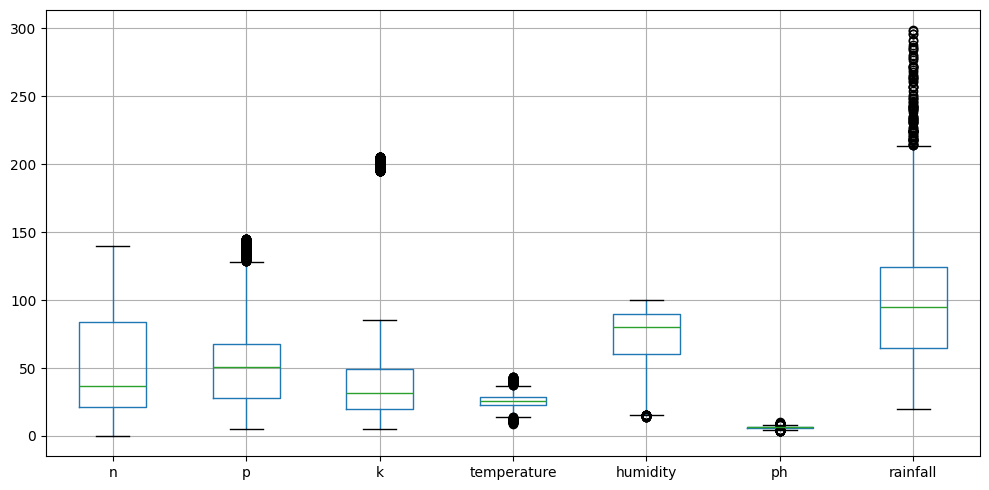

In [11]:
plt.figure(figsize=(10,5))
df[cols].boxplot()
plt.tight_layout()
plt.show()

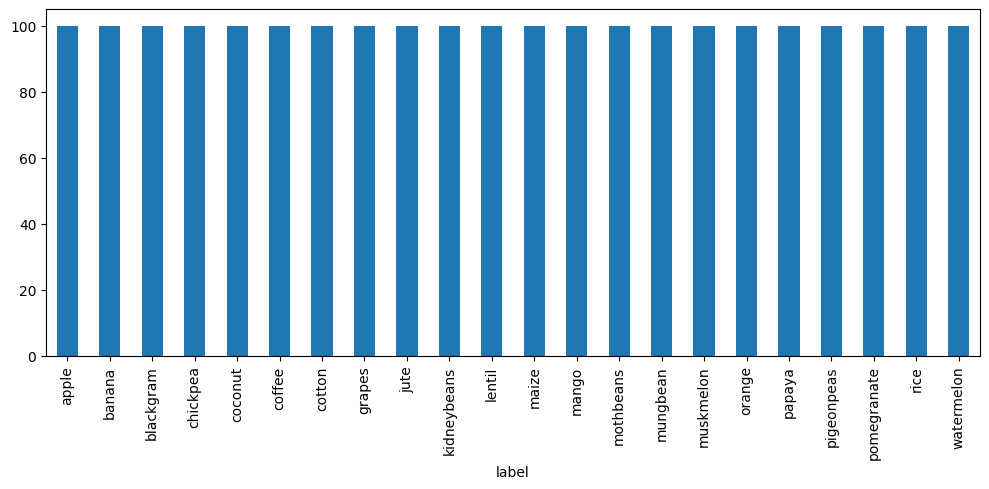

In [12]:
counts = df["label"].value_counts()

plt.figure(figsize=(10,5))
counts.plot(kind="bar")
plt.tight_layout()
plt.show()

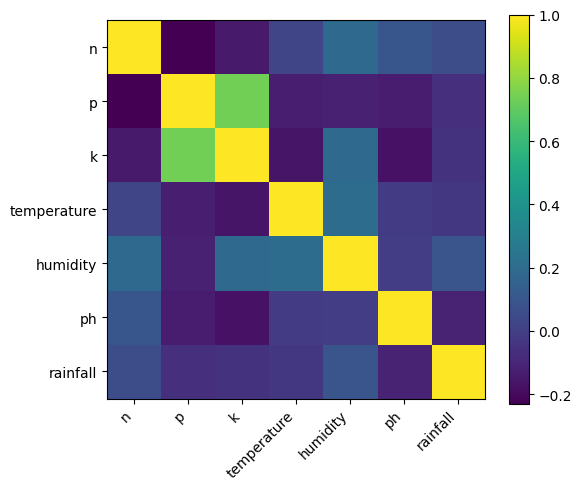

In [13]:
corr = df[cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr)
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.colorbar()
plt.tight_layout()
plt.show()

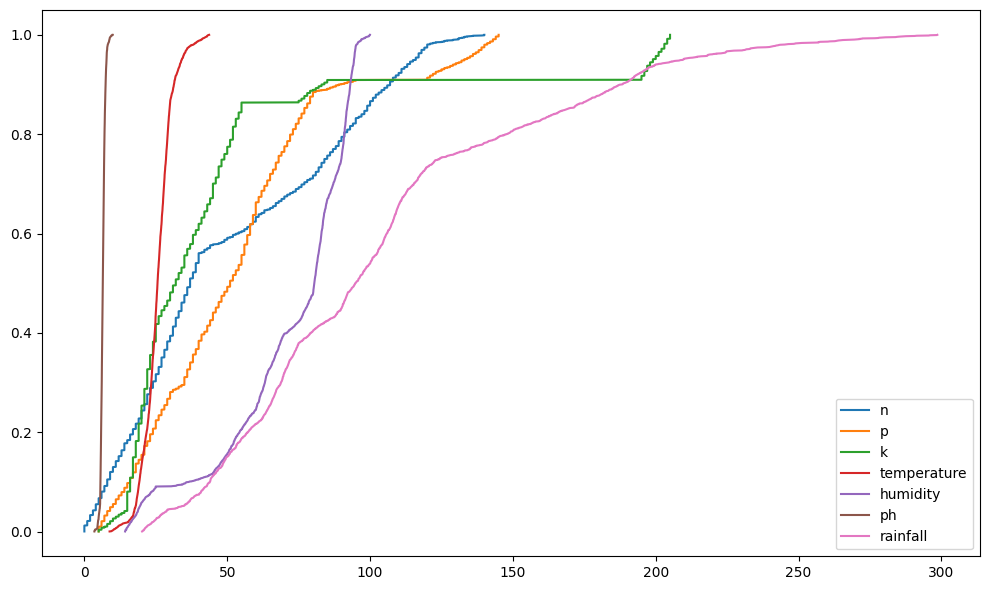

In [14]:
plt.figure(figsize=(10,6))

for c in cols:
    x = df[c].sort_values().to_numpy()
    y = (pd.Series(range(1, len(x)+1)) / len(x)).to_numpy()
    plt.plot(x, y, label=c)

plt.legend()
plt.tight_layout()
plt.show()